## Preprocessor_Fire_GWIS.ipynb

Author: Andreas Prein
    E-mail: prein@ucar.edu
    Date created: 25.03.2020
    Date last modified: 25.03.2020

    ##############################################################
    Purpos:

    1) Reads in daily fire observations that were downloaded from
       https://doi.pangaea.de/10.1594/PANGAEA.895835

    2) Creates a daily gridded dataset that contains daily fire spread
    
    3) Save this dataset in monthly NetCDF files

In [1]:
from dateutil import rrule
import datetime
import glob
from netCDF4 import Dataset
import sys, traceback
import dateutil.parser as dparser
import string
from pdb import set_trace as stop
import numpy as np
import numpy.ma as ma
import os
# from mpl_toolkits import basemap
import pickle
import subprocess
import pandas as pd
from scipy import stats
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import pylab as plt
import random
import scipy.ndimage as ndimage
import matplotlib.gridspec as gridspec
# from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from pylab import *
import string
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapefile
# import shapely.geometry
# import descartes
import shapefile
import math
from scipy.stats.kde import gaussian_kde
from math import radians, cos, sin, asin, sqrt
from scipy import spatial
import matplotlib.path as mplPath
from pylab import *
from scipy.optimize import curve_fit
import scipy
import math
# import SkewT
from scipy.interpolate import interp1d
import shapefile as shp
from shapely.geometry import shape as shapeArea
from pyproj import Proj
from IPython.display import display, clear_output
from datetime import datetime as datetimeBar

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [2]:
################################################################################
################################################################################
#                            Settings

DataFolder='/glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GlobFire2000_to_2020_02/'
SaveDataDir='/glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/'

Grid_Spacing=0.1 # degree-global
TimeDD=pd.date_range(datetime.datetime(2000, 11, 1,0), end=datetime.datetime(2020, 2, 29,0), freq='d')
TimeMM=pd.date_range(datetime.datetime(2000, 11, 1,0), end=datetime.datetime(2019, 11, 30,0), freq='m')
iYearsAll=TimeMM.year
iMonthsAll=TimeMM.month

iTime=np.array(range(len(TimeDD))).astype('int')

#### Create a grid over California

In [3]:
dx_half=Grid_Spacing/2.
xmin, xmax, ymin, ymax = -125+dx_half, -113-dx_half, 32+dx_half, 43-dx_half
iLat=int((ymax-ymin)/Grid_Spacing)
iLon=int(np.abs(xmax-xmin)/Grid_Spacing)
xx, yy = np.meshgrid(np.linspace(xmin,xmax,iLon), np.linspace(ymin,ymax,iLat))
xc = xx.flatten()
yc = yy.flatten()

### Load all the shape files and their date

In [4]:
# loop over months in observational period
s = "-"
for mo in range(len(iMonthsAll)):
    grAllShapes={}    
    sFileAct=DataFolder+'MODIS_BA_GLOBAL_1_'+str(iMonthsAll[mo])+'_'+str(iYearsAll[mo])
    Outfile=SaveDataDir+'PythonData/'+'MODIS_BA_GLOBAL_1_'+str("%02d" % iMonthsAll[mo])+'_'+str(iYearsAll[mo])
    if (os.path.isfile(sFileAct+'.shp') == 1) & (os.path.isfile(Outfile) == 0):
        print('    Process '+sFileAct)
        sf = shp.Reader(sFileAct,'GLOBAL')
        df = read_shapefile(sf)
        for sf in range(df.shape[0]):
            if df['Type'][sf] == 'ActiveArea':
                DateAct=df['IDate'][sf]
                Fdata=df['FDate'][sf]
                if str(DateAct) == str(Fdata):
                    Label=str(df['Id'][sf])+'_'+'-'.join([str(x) for x in DateAct])
                    grAllShapes[Label]=df['coords'][sf]
        
        afile = open(Outfile, 'wb')
        pickle.dump(grAllShapes, afile)
        afile.close()
    else:
        print('    Skipp '+Outfile)

    Skipp /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_11_2000
    Skipp /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_12_2000
    Skipp /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_01_2001
    Skipp /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_02_2001
    Skipp /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_03_2001
    Skipp /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_04_2001
    Skipp /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GL

### Transfere the shapefiles to a grid

In [6]:
FireDataAct=np.zeros((len(TimeDD),xx.shape[0],xx.shape[1]))
for mo in range(len(iMonthsAll)):
    grAllShapes={}    
    sFileAct=SaveDataDir+'PythonData/'+'MODIS_BA_GLOBAL_1_'+str("%02d" % iMonthsAll[mo])+'_'+str(iYearsAll[mo])
#     DataFile=SaveDataDir+'PythonData/All_Data_MODIS_BA_GLOBAL_1_'+str("%02d" % iMonthsAll[mo])+'_'+str(iYearsAll[mo])+'.npy'
    if (os.path.isfile(sFileAct) == 1): # & (os.path.isfile(DataFile) != 1):
#         FireDataAct=np.load(SaveDataDir+'PythonData/All_Data_MODIS_BA_GLOBAL_1_'+str("%02d" % iMonthsAll[mo-1])+'_'+str(iYearsAll[mo-1])+'.npy')
        print('    Process '+sFileAct)
        file2 = open(sFileAct, 'rb')
        DATA = pickle.load(file2)
        file2.close()
        FIRES=list(DATA.keys())
#         Fire_days=[datetimeBar.strptime(list(FIRES)[ii].split('_')[1].replace('-', ''), '%Y%m%d').date() for ii in range(len(FIRES))]
        ctrAll=np.array([np.array(DATA[FIRES[fi]]) for fi in range(len(FIRES))])
        InRegionAll=[((np.min(ctrAll[fi][:,1]) >= ymin) & (np.max(np.min(ctrAll[fi][:,1]) <= ymax)) & (np.min(np.min(ctrAll[fi][:,0]) >= xmin)) & (np.max(np.min(ctrAll[fi][:,0]) <= xmax))) for fi in range(len(FIRES))]
        FIRES=np.array(FIRES)[InRegionAll]
        ctrAll=ctrAll[InRegionAll]
        if len(FIRES) > 0:
            for fi in range(len(FIRES)):
#                 ctr = np.array(DATA[FIRES[fi]])
#                 InRegion=((np.min(ctr[:,1]) >= ymin) & (np.max(ctr[:,1]) <= ymax) & (np.min(ctr[:,0]) >= xmin) & (np.max(ctr[:,0]) <= xmax))
#                 if InRegion == True:
    #                 update_progress(float(fi) / len(FIRES))
                Fire_day=datetimeBar.strptime(list(FIRES)[fi].split('_')[1].replace('-', ''), '%Y%m%d').date()
                iDayAct=((Fire_day.year == TimeDD.year) & (Fire_day.month == TimeDD.month) & (Fire_day.day == TimeDD.day))
                if np.sum(iDayAct) == 1:
                    ctr=np.array(ctrAll[fi])
                    grPRregion=mplPath.Path(ctr)
                    LoMin=np.min(ctr[:,0])
                    LoMax=np.max(ctr[:,0])
                    LaMin=np.min(ctr[:,1])
                    LaMax=np.max(ctr[:,1])

                    # calculate burned area
                    pa = Proj("+proj=aea +lat_1="+str(LaMin)+" +lat_2="+str(LaMax)+" +lat_0="+str(np.mean(ctr[:,1]))+" +lon_0="+str(np.mean(ctr[:,0])))
                    xi, yi = pa(ctr[:,0], ctr[:,1])
                    cop = {"type": "Polygon", "coordinates": [zip(xi, yi)]}
                    AREA=shapeArea(cop).area/(1000.*1000.)
                    GCs=((xx >= LoMin) & (xx <= LoMax) & (yy >= LaMin) & (yy <= LaMax))
                    if np.sum(GCs) == 0:
                        GCs=((xx >= LoMin-0.05) & (xx <= LoMax+0.05) & (yy >= LaMin-0.05) & (yy <= LaMax+0.05))
                    Area_GC=AREA/float(np.sum(GCs))
                    # write data to array
                    FireDataAct[iDayAct,GCs]=Area_GC

        #         # save the data for this month
        #         np.save(SaveDataDir+'PythonData/All_Data_MODIS_BA_GLOBAL_1_'+str("%02d" % iMonthsAll[mo])+'_'+str(iYearsAll[mo])+'.nps', FireDataAct)

    Process /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_11_2000
    Process /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_12_2000
    Process /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_01_2001
    Process /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_02_2001
    Process /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_03_2001
    Process /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonData/MODIS_BA_GLOBAL_1_04_2001
    Process /glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/PythonDa

In [7]:
np.save(SaveDataDir+'PythonData/All_Data_MODIS_BA_GLOBAL_1_2002-2020.npy', FireDataAct)

In [ ]:
FireDataAct=np.load(SaveDataDir+'PythonData/All_Data_MODIS_BA_GLOBAL_1_2002-2020.npy')

### Save data to monthly NetCDF files

(56,
 5,
 [-179.14733999999999, -14.552549492553199, 0.0, 0.0],
 [179.77847, 71.352561, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x2aeb6e54e890>)

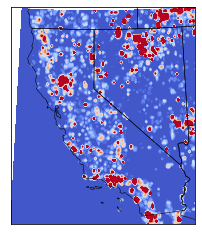

In [11]:
from mpl_toolkits.basemap import Basemap; bm = Basemap()
map = Basemap(llcrnrlon=xmin,llcrnrlat=ymin,urcrnrlon=xmax,urcrnrlat=ymax,
        projection='lcc',lat_1=35,lat_2=40,lon_0=-120)
ii,jj=map(xx,yy)
map.contourf(ii,jj,np.sum(FireDataAct[:,:,:], axis=0), levels=np.linspace(0,20,21), extend='max', cmap='coolwarm')
map.readshapefile('/glade/u/home/prein/ShapeFiles/US-States/cb_2013_us_state_5m', name='states', drawbounds=True)

(56,
 5,
 [-179.14733999999999, -14.552549492553199, 0.0, 0.0],
 [179.77847, 71.352561, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x2b62d0904850>)

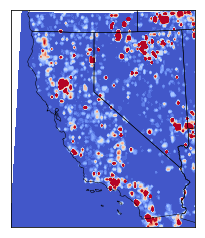

In [5]:
from mpl_toolkits.basemap import Basemap; bm = Basemap()
map = Basemap(llcrnrlon=xmin,llcrnrlat=ymin,urcrnrlon=xmax,urcrnrlat=ymax,
        projection='lcc',lat_1=35,lat_2=40,lon_0=-120)
ii,jj=map(xx,yy)
map.contourf(ii,jj,np.sum(FireDataAct[:,:,:], axis=0), levels=np.linspace(0,20,21), extend='max', cmap='coolwarm')
map.readshapefile('/glade/u/home/prein/ShapeFiles/US-States/cb_2013_us_state_5m', name='states', drawbounds=True)

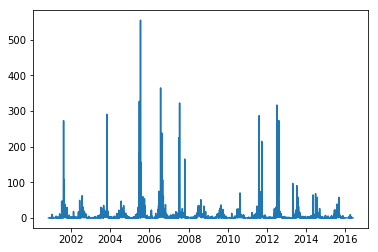

In [9]:
plt.plot(TimeDD,np.sum(FireDataAct, axis=(1,2))); plt.show()

In [7]:
SaveDataDir+'MODIS_BA_GLOBAL_1_'+str(iMonthsAll[mo])+'_'+str(iYearsAll[mo])+'_gridded.nc'

'/glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/GriddedData/MODIS_BA_GLOBAL_1_11_2000_gridded.nc'

In [49]:
np.save(SaveDataDir+'PythonData/All_Data_MODIS_BA_GLOBAL_1_'+str("%02d" % iMonthsAll[mo])+'_'+str(iYearsAll[mo])+'.nps', FireDataAct)

### Save data to NetCDF

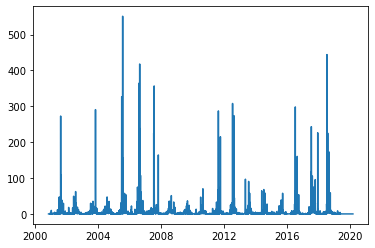

In [10]:
plt.plot(TimeDD,np.sum(FireDataAct, axis=(1,2))); plt.show()

In [42]:
DataFile=SaveDataDir+'PythonData/All_Data_MODIS_BA_GLOBAL_1_'+str("%02d" % iMonthsAll[mo])+'_'+str(iYearsAll[mo])+'.npz'

In [9]:
SaveDataDir

'/glade/campaign/mmm/c3we/prein/observations/Fire-observations/Fire_GWIS/data_20020702/GriddedData/'